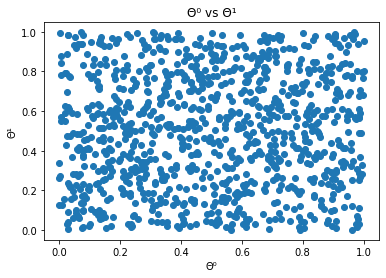

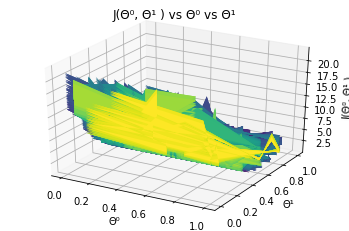

The best fitting model is f(x) = 0.9994355354288555 + 0.649520640230126x


In [2]:
import numpy as np
theta_0 = np.random.uniform(0, 1, 1000)
theta_1 = np.random.uniform(0, 1, 1000)

import matplotlib.pyplot as plt
plt.scatter(theta_0, theta_1)
plt.title("Θ⁰ vs Θ¹")
plt.xlabel("Θ⁰")
plt.ylabel("Θ¹")
plt.show()


import numpy as np
def cost_function(x, y, theta_0, theta_1):
  m = len(x)
  total_error = 0.0
  for i in range(m):
    total_error += (y[i] - (theta_0 + theta_1 * x[i]))**2
  return total_error / m

x = np.linspace(0, 10, 100)
y = 2 + 0.5 * x
theta_0 = np.random.uniform(0, 1, 1000)
theta_1 = np.random.uniform(0, 1, 1000)


cost = np.zeros(shape=(1000, 1000))
for i in range(1000):
  for j in range(1000):
    cost[i,j] = cost_function(x, y, theta_0[i], theta_1[j])
    
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(theta_0, theta_1, cost, cmap='viridis', linewidth=0.2)
ax.set_xlabel('Θ⁰')
ax.set_ylabel('Θ¹')
ax.set_zlabel('J(Θ⁰, Θ¹ )')
plt.title("J(Θ⁰, Θ¹ ) vs Θ⁰ vs Θ¹")
plt.show()

min_index = np.argmin(cost)
i, j = np.unravel_index(min_index, cost.shape)
theta_0_opt = theta_0[i]
theta_1_opt = theta_1[j]
print("The best fitting model is f(x) = {} + {}x".format(theta_0_opt, theta_1_opt))


An